# Importing required Libraries

In [1]:
# Importing the Libraries
import tensorflow as tf
from tensorflow.keras.models import *
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import *
from tensorflow.keras.utils import to_categorical
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\SandeepReddy\Anaconda3\lib\site-packages\tensorflow\python\framework\dtypes.

# Loading the data and counting number of images for each class

In [2]:
import os
class_names = os.listdir('./natural_images/')
print(class_names)

['airplane', 'car', 'cat', 'dog', 'flower', 'fruit', 'motorbike', 'person']


In [3]:
count = []
print("Class : Total Images")
print("-------------")
for label in class_names:
    path = './natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    images_count = len(folder_data)
    count.append(images_count)
    print(label + " : " + str(images_count))

Class : Total Images
-------------
airplane : 727
car : 968
cat : 885
dog : 702
flower : 843
fruit : 1000
motorbike : 788
person : 986


# Plotting number of images for each class

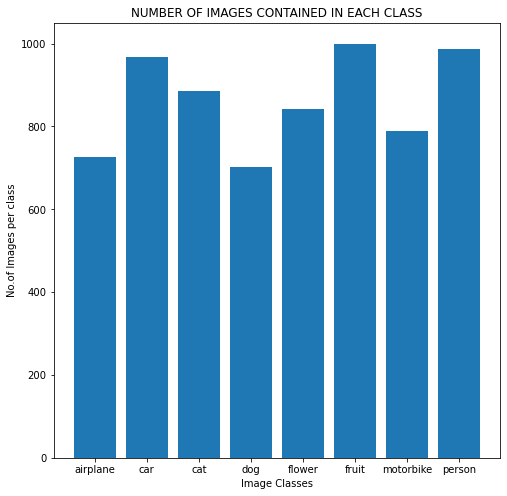

In [4]:
# Distribution of images per each class
plt.figure(figsize = (8,8))
plt.bar(class_names, count)
plt.title('NUMBER OF IMAGES CONTAINED IN EACH CLASS')
plt.xlabel('Image Classes')
plt.ylabel('No.of Images per class')
plt.show()

In [6]:
!pip install opencv-python

  Using cached opencv_python-4.3.0.36-cp37-cp37m-win_amd64.whl (33.4 MB)


# Reading data and converting to Numpy Arrays

In [7]:
# Reading the Data 
images_data =[]
images_labels = []
import cv2
for label in class_names:
    path = './natural_images/{0}/'.format(label)
    folder_data = os.listdir(path)
    for image_path in folder_data:
        image = cv2.imread(path+image_path)
        image_resized = cv2.resize(image, (32,32))
        images_data.append(np.array(image_resized))
        images_labels.append(label)

In [8]:
# Converting the data to Numpy arrays
images_data = np.array(images_data)
images_labels = np.array(images_labels)

In [10]:
images_data.shape


(6899, 32, 32, 3)

In [11]:
images_labels.shape

(6899,)

In [12]:
# Shuffling the Data as we have all the image labels as groups
indices = np.arange(images_data.shape[0])
np.random.shuffle(indices)
images_data = images_data[indices]
images_labels = images_labels[indices]

# Coverting target values to categorical and splitting the data

In [13]:
# Encoding the class Names & converting to categorical values
from sklearn.preprocessing import LabelEncoder
encoded_images_labels = LabelEncoder().fit_transform(images_labels)

In [14]:
from keras.utils import to_categorical
categorical_images_labels = to_categorical(encoded_images_labels)

Using TensorFlow backend.


In [15]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images_data, categorical_images_labels, test_size = 0.25)

# Building CNN Model and fitting our data on the model

In [16]:
# Model Implementation
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=X_train.shape[1:]))
model.add(MaxPool2D(pool_size=(2, 2)))
model.add(Dropout(rate=0.25))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(rate=0.5))
model.add(Dense(len(class_names), activation='softmax'))
model.summary()

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 32)        2432      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
flatten (Flatten)            (None, 6272)              0         
_________________________________________________________________
dense (Dense)                (None, 256)               1605888   
_________________________________________________________________
dropout_1 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 8)                 2

In [17]:
model.compile(
    loss='categorical_crossentropy', 
    optimizer='adam', 
    metrics=['accuracy'])

In [18]:
history = model.fit(X_train, Y_train, epochs=10, validation_split=0.2)

Train on 4139 samples, validate on 1035 samples
Epoch 1/10
4139/4139 [==============================] - 6s 1ms/sample - loss: 16.5543 - acc: 0.4267 - val_loss: 0.9771 - val_acc: 0.6792
Epoch 2/10
4139/4139 [==============================] - 5s 1ms/sample - loss: 1.0325 - acc: 0.6678 - val_loss: 0.8185 - val_acc: 0.7150
Epoch 3/10
4139/4139 [==============================] - 5s 1ms/sample - loss: 0.7844 - acc: 0.7509 - val_loss: 0.7537 - val_acc: 0.7478
Epoch 4/10
4139/4139 [==============================] - 5s 1ms/sample - loss: 0.6046 - acc: 0.8082 - val_loss: 0.7239 - val_acc: 0.7594
Epoch 5/10
4139/4139 [==============================] - 5s 1ms/sample - loss: 0.4871 - acc: 0.8360 - val_loss: 0.7380 - val_acc: 0.7739
Epoch 6/10
4139/4139 [==============================] - 5s 1ms/sample - loss: 0.4297 - acc: 0.8611 - val_loss: 0.7193 - val_acc: 0.7681
Epoch 7/10
4139/4139 [==============================] - 5s 1ms/sample - loss: 0.3284 - acc: 0.8937 - val_loss: 0.6861 - val_acc: 0.7894

# Saving the model using .h5 model and loading back the saved model and predicting test data on that

In [19]:
model.save('task3.h5')

In [20]:
image_classifier = load_model('task3.h5')
y_pred = image_classifier.predict_classes(X_test)
y_pred

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


array([0, 5, 0, ..., 6, 5, 0], dtype=int64)

In [21]:
#converting y test to actual labels.
y_test = np.argmax(Y_test, axis = 1)
y_test

array([0, 5, 0, ..., 6, 5, 0], dtype=int64)

# Accuracy before scaling

In [22]:
# Accuracy calculation
from sklearn.metrics import accuracy_score
print('The Accuracy is:', accuracy_score(y_pred,y_test) * 100)

The Accuracy is: 79.13043478260869


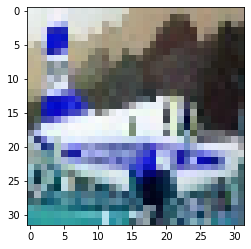

Actual Value for :airplane
Predicted Value for : airplane



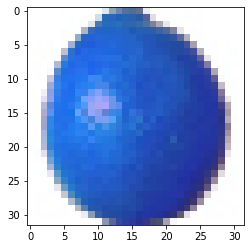

Actual Value for :fruit
Predicted Value for : fruit



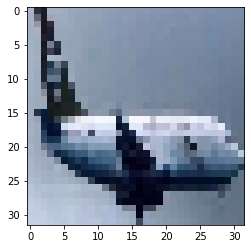

Actual Value for :airplane
Predicted Value for : airplane



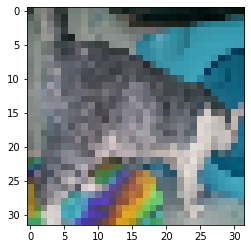

Actual Value for :cat
Predicted Value for : person



In [23]:
# Predicting the Result for few test images
for i in range(0,4):
    plt.imshow(X_test[i,:,:])  
    plt.show()
    predicted_value = image_classifier.predict(X_test[[i],:])
    predict_classes = image_classifier.predict_classes(X_test[[i],:])
    actual_value = Y_test[[i],:]
    print("Actual Value for :" + str(class_names[np.argmax(actual_value)]))
    print("Predicted Value for : "  + str(class_names[predict_classes[0]])+'\n')

# Scaling the data, saving the model and predicting images from that

In [24]:
# Scaling the data
images_data_scaled = images_data / 255

In [25]:
# Splitting the data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(images_data_scaled, categorical_images_labels, test_size = 0.25)

In [26]:
history1 = model.fit(X_train, Y_train, epochs=10, validation_data=(X_test,Y_test))

Train on 5174 samples, validate on 1725 samples
Epoch 1/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 1.1604 - acc: 0.5800 - val_loss: 0.6249 - val_acc: 0.8128
Epoch 2/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 0.6347 - acc: 0.7777 - val_loss: 0.4506 - val_acc: 0.8649
Epoch 3/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 0.4997 - acc: 0.8261 - val_loss: 0.4047 - val_acc: 0.8696
Epoch 4/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 0.4216 - acc: 0.8560 - val_loss: 0.3323 - val_acc: 0.8910
Epoch 5/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 0.3657 - acc: 0.8684 - val_loss: 0.3189 - val_acc: 0.8846
Epoch 6/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 0.3230 - acc: 0.8910 - val_loss: 0.2999 - val_acc: 0.8933
Epoch 7/10
5174/5174 [==============================] - 7s 1ms/sample - loss: 0.2963 - acc: 0.8933 - val_loss: 0.3008 - val_acc: 0.8928


In [27]:
model.save('image_classifier_scaled.h5')
img_classifier_scaled_model =  load_model('image_classifier_scaled.h5')
y_pred = img_classifier_scaled_model.predict_classes(X_test)
y_pred

array([2, 4, 1, ..., 7, 3, 0], dtype=int64)

In [28]:
#converting y test to actual labels.
y_test = np.argmax(Y_test, axis = 1)
y_test

array([2, 4, 1, ..., 7, 2, 0], dtype=int64)

# Accuracy after scaling

In [29]:
print('The Accuracy is:', accuracy_score(y_pred,y_test) * 100)

The Accuracy is: 90.20289855072464


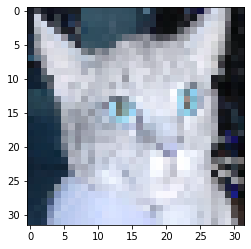

Actual Value for :cat
Predicted Value for : cat



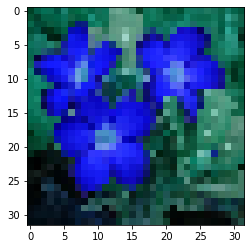

Actual Value for :flower
Predicted Value for : flower



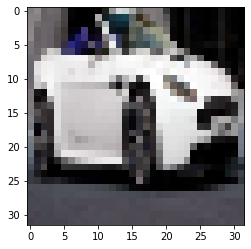

Actual Value for :car
Predicted Value for : car



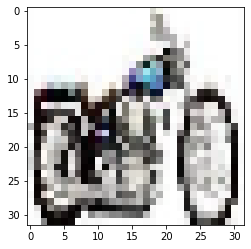

Actual Value for :motorbike
Predicted Value for : motorbike



In [30]:
# Predicting the Result for few test images
for i in range(0,4):
    plt.imshow(X_test[i,:,:])  
    plt.show()
    predicted_value = img_classifier_scaled_model.predict(X_test[[i],:])
    predict_classes = img_classifier_scaled_model.predict_classes(X_test[[i],:])
    actual_value = Y_test[[i],:]
    print("Actual Value for :" + str(class_names[np.argmax(actual_value)]))
    print("Predicted Value for : "  + str(class_names[predict_classes[0]])+'\n')